In [1]:
import sys
sys.path.append("../../")

from scipy.interpolate import CubicSpline
import math
import numpy as np
import matplotlib.pyplot as plt

from didgelab.evo.nuevolution import GeoGenome
from didgelab.calc.geo import Geo, geotools
from didgelab.util.didge_visualizer import vis_didge
from didgelab.calc.sim.sim import compute_impedance_iteratively, get_notes, compute_impedance, create_segments, get_log_simulation_frequencies


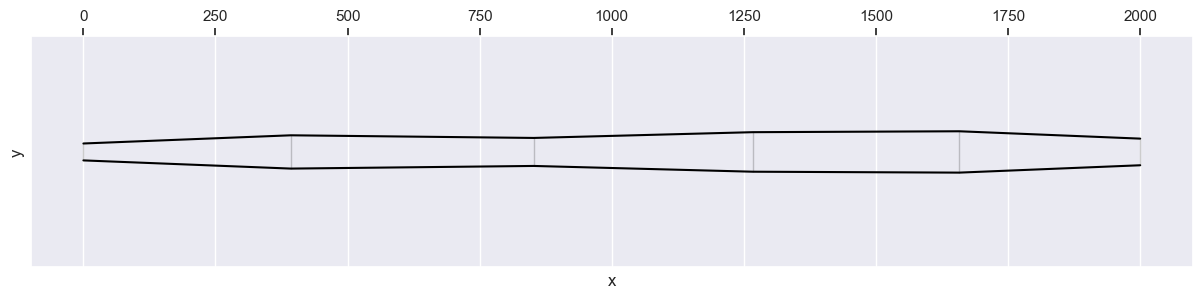

6 11


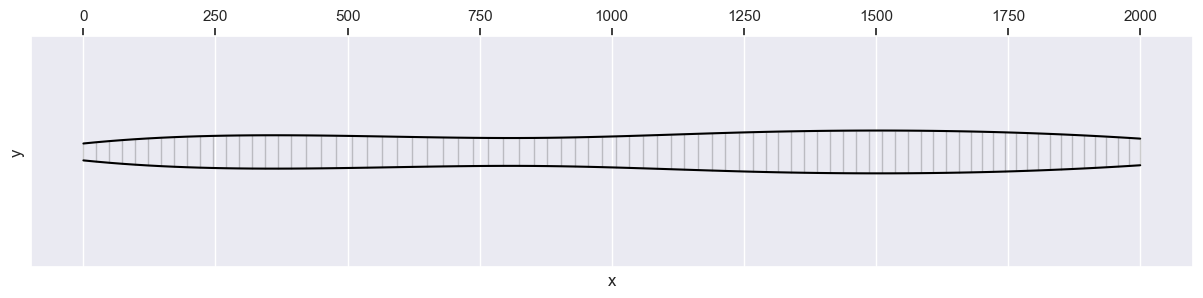

In [57]:
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline


def make_shape(n=5):
    length = 2000
    d0 = 32
    dend = 80

    _x = np.random.uniform(0.3, 1.0, size=n)
    x = [0]
    for i in range(len(_x)):
        x.append(x[-1] + _x[i])

    #x = np.concatenate(([0], np.random.sample(n))) * length
    x = np.array(x)
    x = length*x/x[-1]
    y = np.random.sample(n)*(dend-d0) + d0
    y = np.concatenate(([d0], y))

    return x,y

def smooth(x1,y1):
    cs = CubicSpline(x1, y1)

    x2 = [0]
    for i in range(1, len(x1)):
        x2.append(0.5*(x1[i]+x1[i-1]))
        x2.append(x1[i])
    y2 = cs(x2)
    return x2,y2
np.random.seed(0)

for i in range(2,7):
    x1,y1 = make_shape()

    geo = Geo(list(zip(x1,y1)))
    vis_didge(geo)
    plt.show()

    x2,y2 = smooth(x1,y1)
    print(len(x1), len(x2))
    x2,y2 = smooth(x2,y2)
    x2,y2 = smooth(x2,y2)
    x2,y2 = smooth(x2,y2)
    geo = Geo(list(zip(x2,y2)))
    vis_didge(geo)
    plt.show()
    break

[0.0,
 766.8830376515554,
 847.3095986778094,
 875.174422525385,
 1089.7663659937937,
 1097.6270078546495,
 1205.5267521432877,
 1291.7882261333123,
 1430.378732744839,
 1783.5460015641595,
 1927.3255210020586]

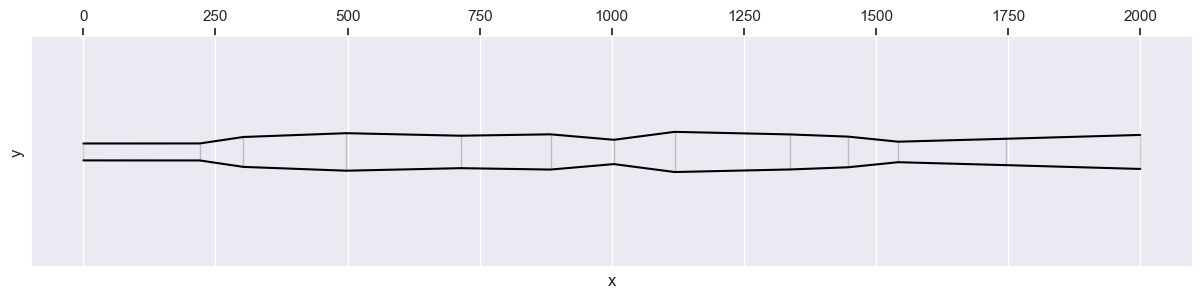

2
[32.         28.         32.18951678 45.11739729 56.58522864 70.89599907
 71.00580616 63.47698697 61.40125121 68.49892235 66.64425524 53.14363796
 46.01005127 58.48825428 76.05315788 79.78541687 66.2996376  63.11207286
 58.04212966 48.46629769 38.82416228 35.99213137 49.92035648 68.96645407
 64.35841352]


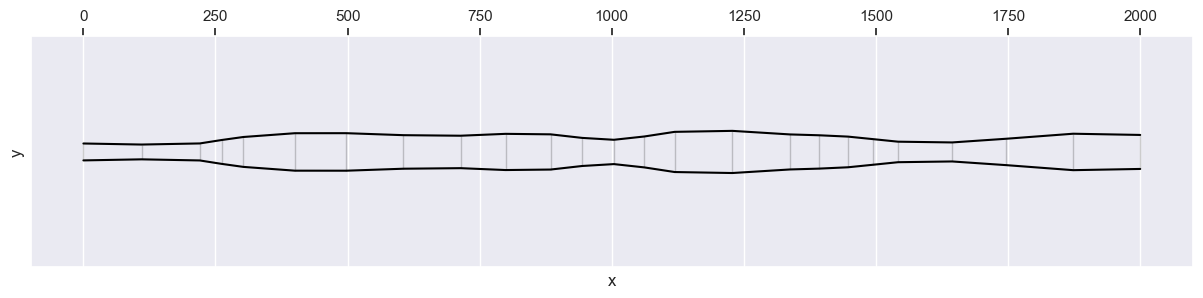

3
[32.         32.64058107 28.         28.         32.18951678 38.29875549
 45.11739729 51.29172229 56.58522864 65.83321374 70.89599907 72.34017337
 71.00580616 67.47786387 63.47698697 60.83358972 61.40125121 64.72381551
 68.49892235 70.0356551  66.64425524 60.44190423 53.14363796 47.43711735
 46.01005127 50.32906197 58.48825428 67.91912095 76.05315788 82.47507582
 79.78541687 72.79124822 66.2996376  64.48814767 63.11207286 61.26540342
 58.04212966 53.68519627 48.46629769 43.23082326 38.82416228 34.4169145
 35.99213137 41.75741224 49.92035648 60.6888934  68.96645407 71.3304802
 64.35841352]


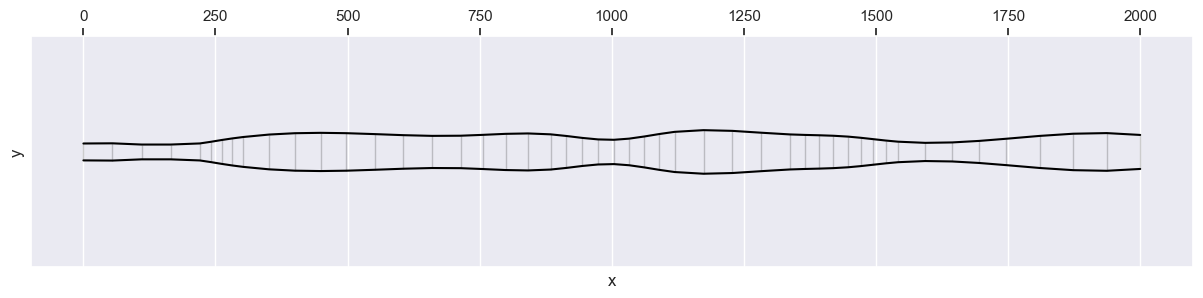

<AxesSubplot: xlabel='freq', ylabel='impedance'>

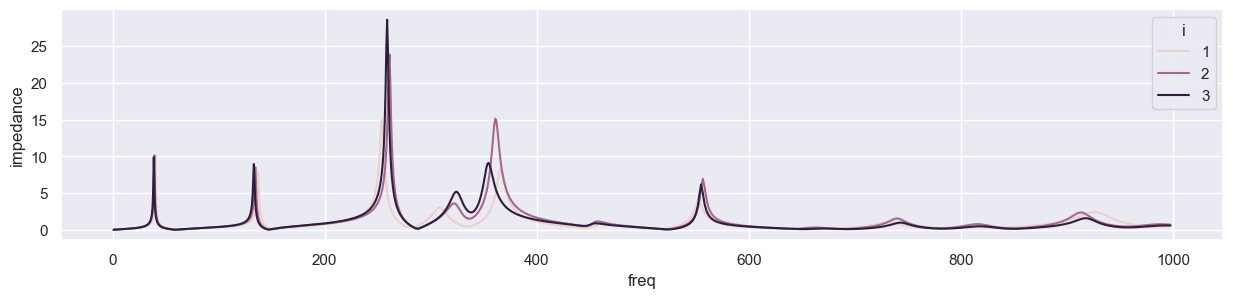

In [71]:
import pandas as pd
import seaborn as sns

np.random.seed(10)
x1,y1 = make_shape(n=12)

geo = Geo(list(zip(x1,y1)))
vis_didge(geo)
plt.show()

freqs = get_log_simulation_frequencies(1, 1000, 5)
geo = Geo(list(zip(x1,y1)))
segments = create_segments(geo)
impedances = compute_impedance(segments, freqs)

dfs = []
df = pd.DataFrame({
    "i": [1] * len(impedances),
    "freq": freqs,
    "impedance": impedances
})
dfs.append(df)

x2=x1.copy()
y2=y1.copy()

def smooth(x1,y1):
    cs = CubicSpline(x1, y1)

    x2 = [0]
    for i in range(1, len(x1)):
        x2.append(0.5*(x1[i]+x1[i-1]))
        x2.append(x1[i])
    y2 = cs(x2)
    mind = 28
    y2[y2<mind] = mind
    return x2,y2

for i in range(2,4):
    print(i)
    x2,y2 = smooth(x2,y2)
    print(y2)
    geo = Geo(list(zip(x2,y2)))
    vis_didge(geo)
    plt.show()

    segments = create_segments(geo)
    impedances = compute_impedance(segments, freqs)

    df = pd.DataFrame({
        "i": [i] * len(impedances),
        "freq": freqs,
        "impedance": impedances
    })
    dfs.append(df)

dfs = pd.concat(dfs)
sns.lineplot(data=dfs, x="freq", y="impedance", hue="i")

In [68]:
x=np.random.sample(10)
mind = 0.9
x[x<mind] = mind
x

array([0.9       , 0.94426071, 0.98762547, 0.9       , 0.9       ,
       0.9       , 0.9       , 0.90283176, 0.9       , 0.9       ])

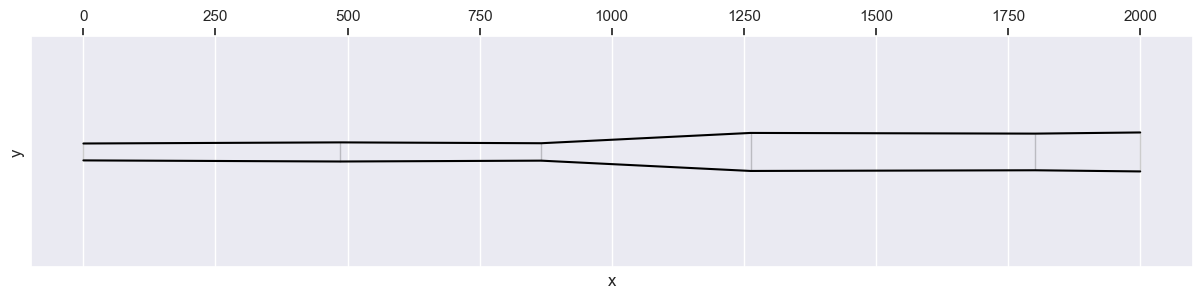

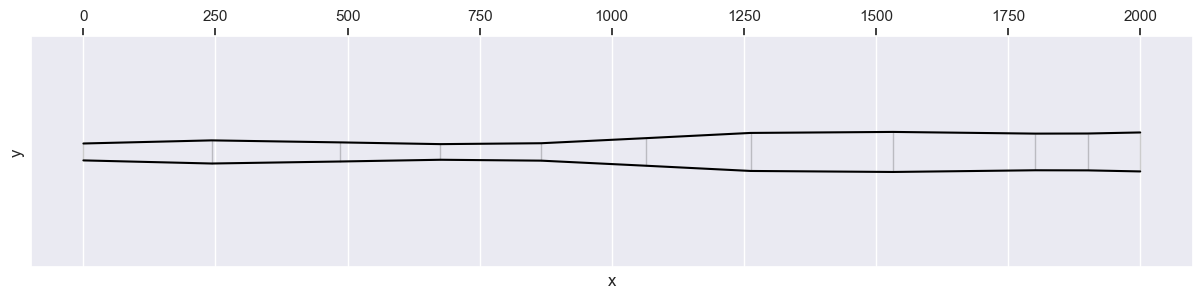

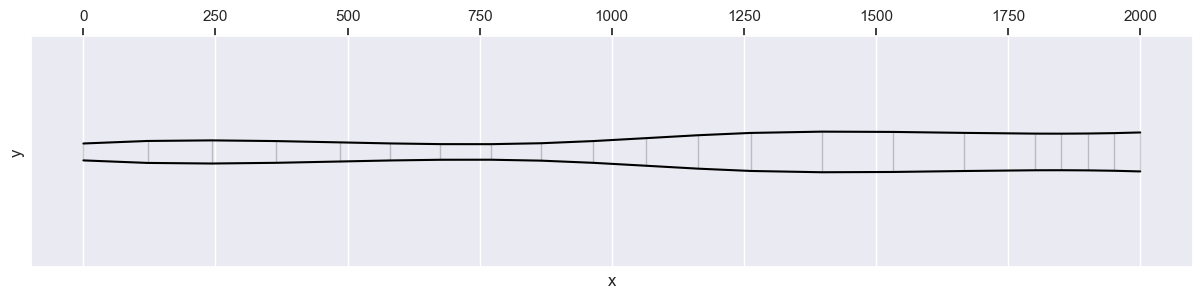

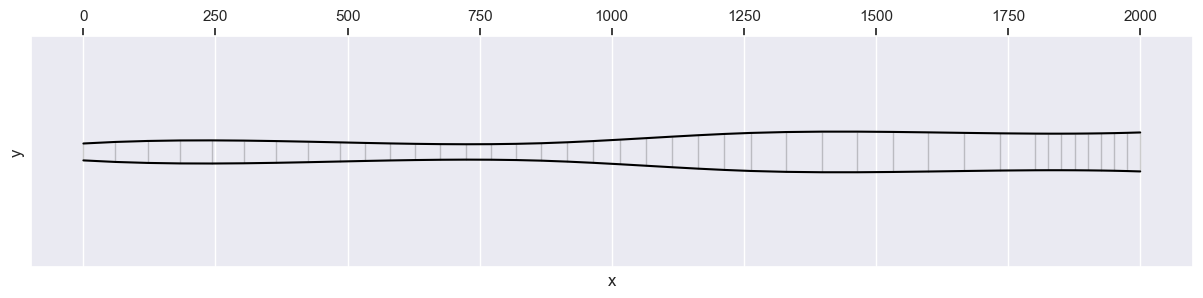

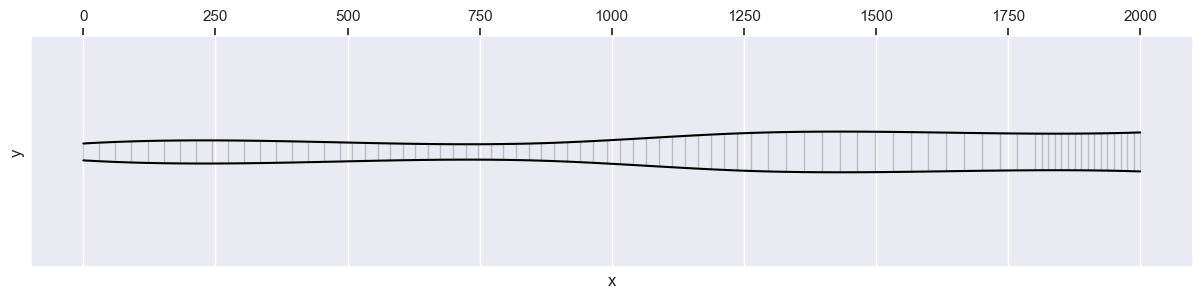

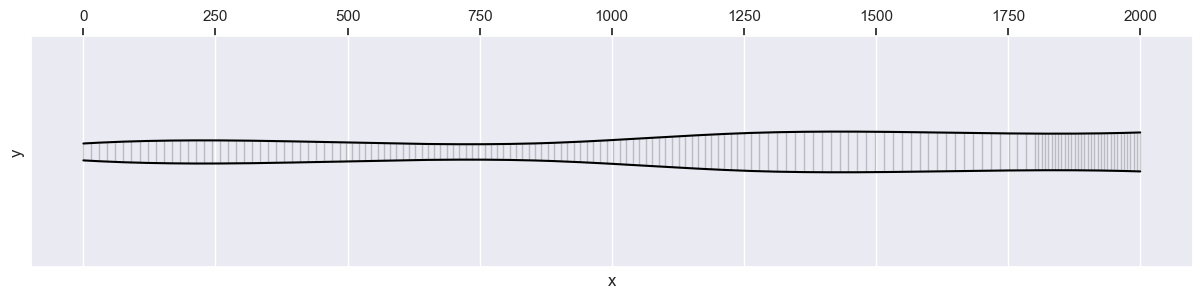

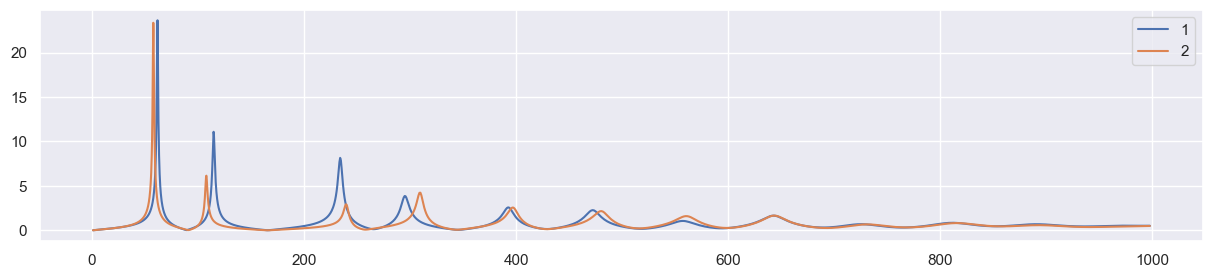

In [58]:
def analyse(x,y):
    geo = Geo(list(zip(x,y)))
    freqs = get_log_simulation_frequencies(1, 1000, 5)
    segments = create_segments(geo)
    impedances = compute_impedance(segments, freqs)
    notes = get_notes(freqs, impedances)
    return notes, freqs, impedances

x1,y1 = make_shape()

geo = Geo(list(zip(x1,y1)))
vis_didge(geo)
plt.show()

x2,y2 = smooth(x1,y1)
geo = Geo(list(zip(x2,y2)))
vis_didge(geo)
plt.show()
notes1, freqs1, impedances1 = analyse(x1,y1)
notes2, freqs2, impedances2 = analyse(x2,y2)

x2,y2 = smooth(x2,y2)
geo = Geo(list(zip(x2,y2)))
vis_didge(geo)
plt.show()
x2,y2 = smooth(x2,y2)
geo = Geo(list(zip(x2,y2)))
vis_didge(geo)
plt.show()
x2,y2 = smooth(x2,y2)
geo = Geo(list(zip(x2,y2)))
vis_didge(geo)
plt.show()
x2,y2 = smooth(x2,y2)
geo = Geo(list(zip(x2,y2)))
vis_didge(geo)
plt.show()

plt.plot(freqs1, impedances1, label="1")
plt.plot(freqs2, impedances2, label="2")
plt.legend()


In [12]:
analyse(x2,y2)


,note_name,cent_diff,note_nr,freq,impedance,rel_imp
0,D#0,27.368344,-42,39.510568,11.546608,0.370272
1,C2,42.368344,-21,134.053648,2.062254,0.066132
2,C3,-32.631656,-9,256.740426,28.279986,0.906872
3,E3,42.368344,-5,337.794025,14.606528,0.468397
4,G3,42.368344,-2,401.707058,31.184103,1.000000
5,B4,-37.631656,2,483.263648,11.995080,0.384654
6,C#4,42.368344,4,568.099570,4.274425,0.137071
7,E4,2.368344,7,660.157598,2.748063,0.088124
8,F#4,22.368344,9,749.611876,1.920655,0.061591
9,G#4,17.368344,11,838.984298,1.543487,0.049496
